# Health Insurance Cost - Machine Learning Project

##Description:

The objective of the dataset is to predict health insurance cost, based on certain measurements included in the dataset.

##Step 0: Import libraries and Dataset

In [1]:
# Importing Libraries:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Train dataset
dataset = pd.read_csv('Insurance_data.csv')
# Top 5 records:
dataset.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


##Step 1: Descriptive Statistics

In [3]:
# Shape of dataset:
dataset.shape

(3630, 7)

In [4]:
# Cheacking for NaN Values (Missing Values):
dataset.isnull().sum()

age         0
sex         0
bmi         0
smoker      0
region      0
children    0
charges     0
dtype: int64

In [5]:
# Insights of dataset:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   region    3630 non-null   object 
 5   children  3630 non-null   int64  
 6   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 198.6+ KB


In [6]:
# Description of dataset (Numeric)
dataset.describe()

,age,bmi,children,charges
count,3630.000000,3630.000000,3630.000000,3630.000000
mean,38.887036,30.629652,2.503581,12784.808644
std,12.151029,5.441307,1.712568,10746.166743
min,18.000000,15.960000,0.000000,1121.873900
25%,29.000000,26.694526,1.000000,5654.818262
50%,39.170922,30.200000,3.000000,9443.807222
75%,48.343281,34.100000,4.000000,14680.407505
max,64.000000,53.130000,5.000000,63770.428010


In [7]:
# Description of dataset (Categorical):
dataset.describe(include=['O'])

,sex,smoker,region
count,3630,3630,3630
unique,2,2,4
top,male,no,southeast
freq,2029,3070,1021


##Step 2: Data Visualization

#### Medical Insurance Charges:

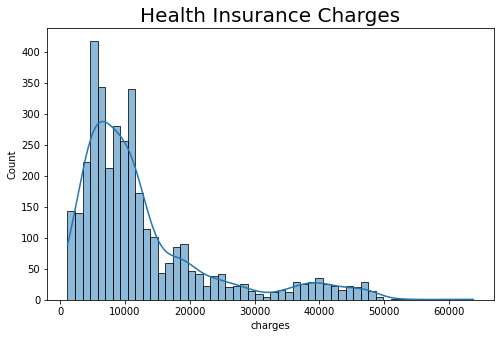

In [8]:
# Histrogram of Medical Insurance Charges:
plt.figure(figsize=(8,5))
sns.histplot(dataset['charges'], kde=True)
plt.title('Health Insurance Charges', fontsize=20)
plt.show()

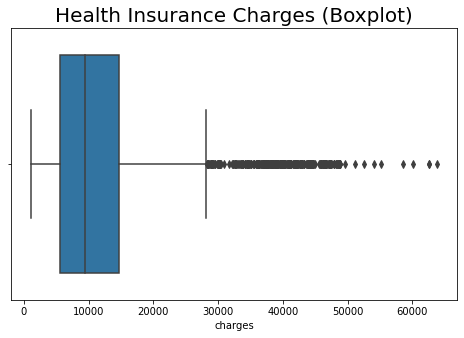

In [9]:
# Boxplot of Medical Insurance Charges:
plt.figure(figsize=(8,5))
sns.boxplot(dataset['charges'])
plt.title('Health Insurance Charges (Boxplot)', fontsize=20)
plt.show()

#### Age:

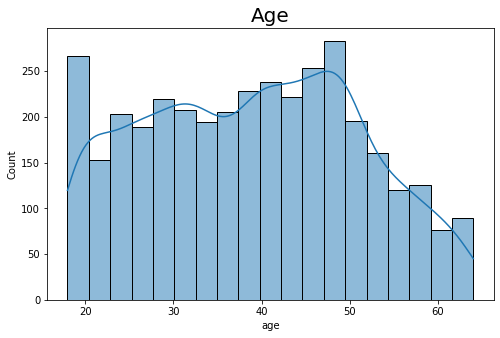

In [10]:
# Histrogram of Age:
plt.figure(figsize=(8,5))
sns.histplot(dataset['age'], kde=True)
plt.title('Age', fontsize=20)
plt.show()

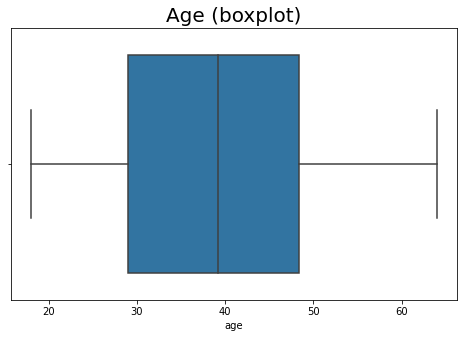

In [11]:
# Boxplot of Age:
plt.figure(figsize=(8,5))
sns.boxplot(dataset['age'])
plt.title('Age (boxplot)', fontsize=20)
plt.show()

#### Body Mass Index:

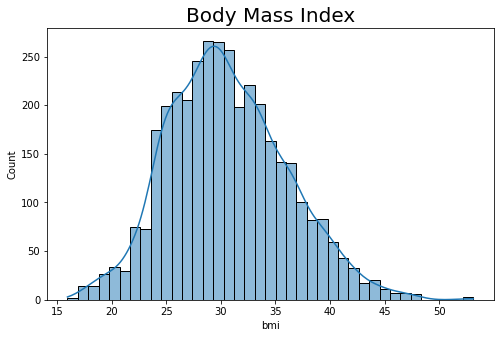

In [12]:
# Histrogram of Body Mass Index:
plt.figure(figsize=(8,5))
sns.histplot(dataset['bmi'], kde=True)
plt.title('Body Mass Index', fontsize=20)
plt.show()

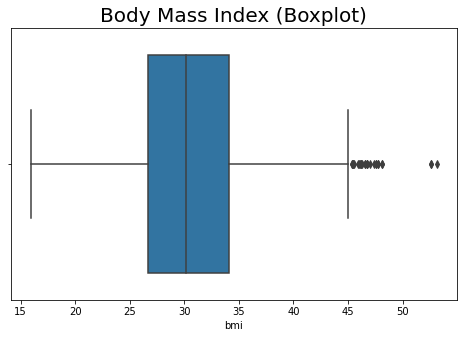

In [13]:
# Boxplot of Body Mass Index:
plt.figure(figsize=(8,5))
sns.boxplot(dataset['bmi'])
plt.title('Body Mass Index (Boxplot)', fontsize=20)
plt.show()

#### children:

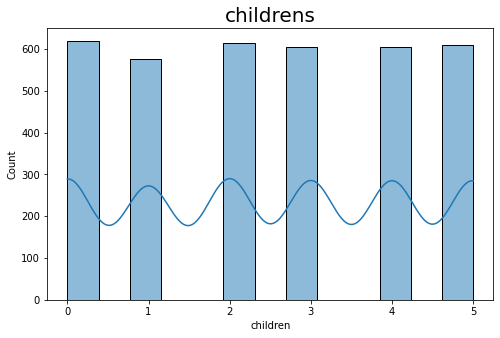

In [14]:
# Histrogram of children:
plt.figure(figsize=(8,5))
sns.histplot(dataset['children'], kde=True)
plt.title('childrens', fontsize=20)
plt.show()

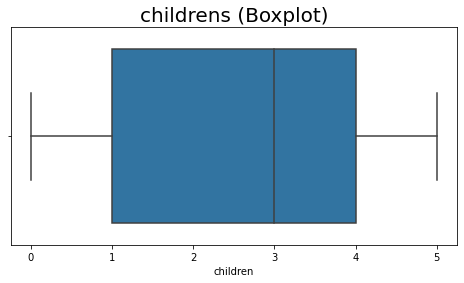

In [15]:
# Boxplot of children:
plt.figure(figsize=(8,4))
sns.boxplot(dataset['children'])
plt.title('childrens (Boxplot)', fontsize=20)
plt.show()

#### Sex:

Male   : 2029
Female : 1601


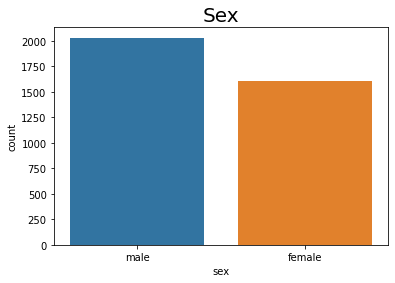

In [16]:
# Value Counts:
print("Male   :", dataset['sex'].value_counts()[0])
print("Female :", dataset['sex'].value_counts()[1])

# Visualization:
plt.figure(figsize=(6,4))
sns.countplot(dataset['sex'])
plt.title('Sex', fontsize=20)
plt.show()

#### Smokers:

Smokers     : 560
Non-Smokers : 3070


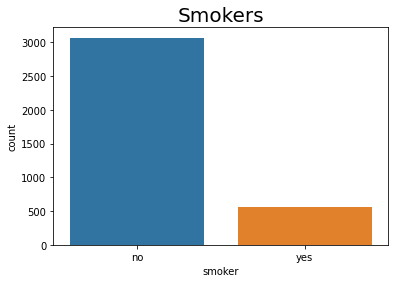

In [17]:
# Value Counts:
print("Smokers     :", dataset['smoker'].value_counts()[1])
print("Non-Smokers :", dataset['smoker'].value_counts()[0])

# Visualization:
sns.countplot(dataset['smoker'])
sns.countplot(dataset['smoker'])
plt.title('Smokers', fontsize=20)
plt.show()

#### Region:

South-East region : 1021
North-West region : 911
South-West region : 850
North-East region : 848


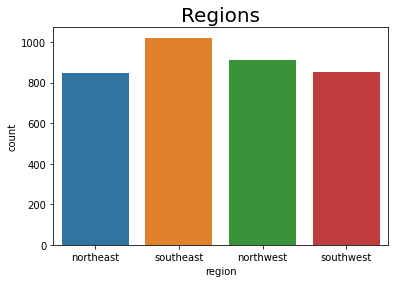

In [18]:
# Value Counts:
print("South-East region :", dataset['region'].value_counts()[0])
print("North-West region :", dataset['region'].value_counts()[1])
print("South-West region :", dataset['region'].value_counts()[2])
print("North-East region :", dataset['region'].value_counts()[3])

# Visualization:
sns.countplot(dataset['region'])
sns.countplot(dataset['region'])
plt.title('Regions', fontsize=20)
plt.show()

##Step 3: Data Preprocessing

In [19]:
# top 5 records:
dataset.head()

,age,sex,bmi,smoker,region,children,charges
0,21.000000,male,25.745000,no,northeast,2,3279.868550
1,36.976978,female,25.744165,yes,southeast,3,21454.494239
2,18.000000,male,30.030000,no,southeast,1,1720.353700
3,37.000000,male,30.676891,no,northeast,3,6801.437542
4,58.000000,male,32.010000,no,southeast,1,11946.625900


In [20]:
# Rounding Age values:
dataset['age'] = round(dataset['age'])

In [21]:
# top 5 records, after rounding Age values:
dataset.head()

,age,sex,bmi,smoker,region,children,charges
0,21.0,male,25.745000,no,northeast,2,3279.868550
1,37.0,female,25.744165,yes,southeast,3,21454.494239
2,18.0,male,30.030000,no,southeast,1,1720.353700
3,37.0,male,30.676891,no,northeast,3,6801.437542
4,58.0,male,32.010000,no,southeast,1,11946.625900


In [22]:
# one hot Encoding:
dataset = pd.get_dummies(dataset, drop_first=True)

In [23]:
# top 5 records, after encoding:
dataset.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,21.0,25.745000,2,3279.868550,1,0,0,0,0
1,37.0,25.744165,3,21454.494239,0,1,0,1,0
2,18.0,30.030000,1,1720.353700,1,0,0,1,0
3,37.0,30.676891,3,6801.437542,1,0,0,0,0
4,58.0,32.010000,1,11946.625900,1,0,0,1,0


In [24]:
# Columns of dataset:
dataset.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_male', 'smoker_yes',
       'region_northwest', 'region_southeast', 'region_southwest'],
      dtype='object')

In [25]:
# Rearranging columns to see better: 
dataset = dataset[['age','sex_male','smoker_yes','bmi','children','region_northwest','region_southeast','region_southwest','charges']]
dataset.head(2)

,age,sex_male,smoker_yes,bmi,children,region_northwest,region_southeast,region_southwest,charges
0,21.0,1,0,25.745000,2,0,0,0,3279.868550
1,37.0,0,1,25.744165,3,0,1,0,21454.494239


In [26]:
# Splitting Independent & Dependent Feature:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [27]:
# top 5 records of Independent feature:
X.head()

,age,sex_male,smoker_yes,bmi,children,region_northwest,region_southeast,region_southwest
0,21.0,1,0,25.745000,2,0,0,0
1,37.0,0,1,25.744165,3,0,1,0
2,18.0,1,0,30.030000,1,0,1,0
3,37.0,1,0,30.676891,3,0,0,0
4,58.0,1,0,32.010000,1,0,1,0


In [28]:
# top 5 records of Dependent Feature:
y.head()

0     3279.868550
1    21454.494239
2     1720.353700
3     6801.437542
4    11946.625900
Name: charges, dtype: float64

In [29]:
# Train Test Split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

##Step 4:Model Building & Model Evaluation

In [30]:
# Importing Performance Metrics:
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
# Linear Regression:
from sklearn.linear_model import LinearRegression
LinearRegression = LinearRegression()
LinearRegression = LinearRegression.fit(X_train, y_train)

# Prediction:
y_pred = LinearRegression.predict(X_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.7482602892322037
30898859.03596079


In [32]:
# Ridge:
from sklearn.linear_model import Ridge
Ridge = Ridge()
Ridge = Ridge.fit(X_train, y_train)

# Prediction:
y_pred = Ridge.predict(X_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.748102888431925
30918178.614604652


In [33]:
# Lasso:
from sklearn.linear_model import Lasso
Lasso = Lasso()
Lasso = Lasso.fit(X_train, y_train)

# Prediction:
y_pred = Lasso.predict(X_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.7482269824960902
30902947.14800708


In [34]:
# Random Forest Regressor:
from sklearn.ensemble import RandomForestRegressor
RandomForestRegressor = RandomForestRegressor()
RandomForestRegressor = RandomForestRegressor.fit(X_train, y_train)

# Prediction:
y_pred = RandomForestRegressor.predict(X_test)

# Scores:
print(r2_score(y_test, y_pred))
print(mean_squared_error(y_test, y_pred))

0.9054053312722027
11610672.490482284


##Conclusion about Model Selection

Here, created Four models, they are Linear Regression, Ridge Regression, Lasso Regression and Random Forest Regressor.

Compare the r2-Score and mean_squared_error. 
The algorithm having a better r2-Score and mean_squared_error shall be considered for create model.

Here we find the best model as Random Forest Regression model with

# r2_score = 0.90

##save the model to disk

In [ ]:
# Creating a pickle file for the model
import pickle
filename = 'HealthInsuranceCost.pkl'
pickle.dump(RandomForestRegressor, open(filename, 'wb'))